### Importing Libraries


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset & Extracting Features

In [2]:

dis = pd.read_csv('../../../data/dateset1/Training.csv')
X = dis.iloc[:, :-1].values
y = dis.iloc[:, -1].values

### Data Splitting & Preprocessing 

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Model Training & Predicting

In [4]:
from sklearn.svm import SVC
clf = SVC(C=3, kernel='poly', degree=5, gamma=0.1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Model Evalaution

In [5]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print()
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred))

0.9634146341463414



### Cross Validation

In [6]:
from sklearn.model_selection import cross_val_score
cVal = 10

In [7]:

score = cross_val_score(clf, X_train, y_train,cv=cVal)
print(score) 
print(score.mean()) 


[0.94202899 0.95362319 0.95072464 0.96231884 0.94767442 0.94767442
 0.97383721 0.93313953 0.95348837 0.95930233]
0.9523811931243682


### HyperParameter Tuning


In [8]:
# from sklearn.model_selection import GridSearchCV
# # clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=5)
# param_grid = {'C':list(range(0,10)),
#                'kernel' : ['poly'],
#                'degree' : list(range(0,7))
#                }

# grid_search = GridSearchCV(SVC(), param_grid, cv=cVal)
# grid_search.fit(X_train, y_train)

In [9]:
# pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [10]:
# grid_search.best_params_

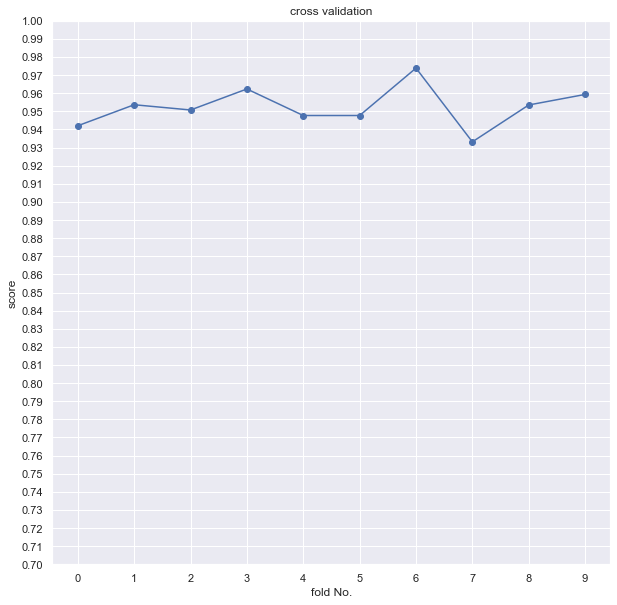

In [11]:
plt.figure(figsize=(10, 10))
plt.plot(range(0,cVal), score)
plt.scatter(range(0,cVal), score)


plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0.7, 1, 0.01))

plt.show()

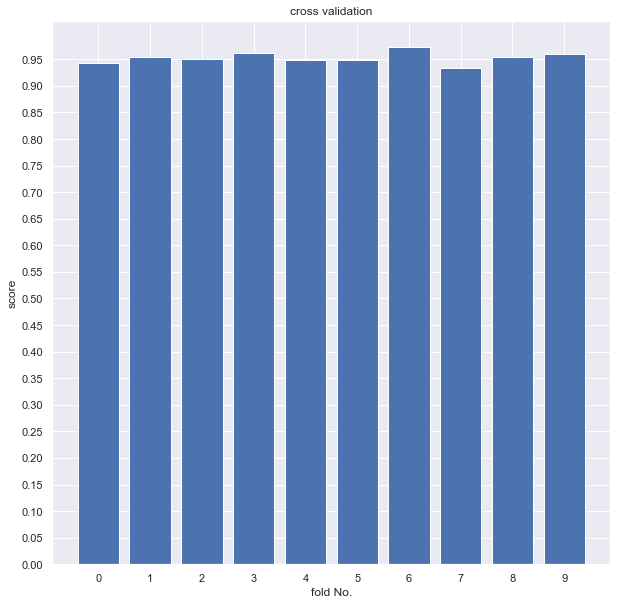

In [12]:
plt.figure(figsize=(10, 10))
plt.bar(range(0,cVal), score)
# plt.plot(range(0,20), scores)

plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0, 1, 0.05))

plt.show()